# Метод стрельбы и метод квазилинеаризации: XI.9.3(a)

## Метод стрельбы

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def d2y(x, y):
    return x * np.sqrt(y)

def f(x, f0, df, h):
    f_new = f0 + df(x, f0) * h
    eps = 1e-4
    for i in range(1000):
        if abs(f_new - f0) <= eps:
            return f_new
        f0 = f_new
        f_new = f0 + df(x, f0) * h
    print("Too many iterations!")
    return f_new

def calculateY(x_arr, y0, alpha, h):
    y = y0
    dy = alpha
    ys = []
    for x in x_arr:
        ys.append(y)
        y += dy * h
        dy = f(x, dy, d2y, h)
    return ys

In [10]:
def shootingMethod(x_arr, y0, y1, calc_y, alpha, h_alpha, eps, h):
    y_new = calc_y(x_arr, y0, alpha, h)
    F = y_new[-1] - y1
    while abs(F) > eps:
        y_new = calc_y(x_arr, y0, alpha + h_alpha, h)
        dF = (y_new[-1] - y1 - F) / h_alpha

        alpha = alpha - F/dF

        y_new = calc_y(x_arr, y0, alpha, h)
        F = y_new[-1] - y1
    return y_new, alpha

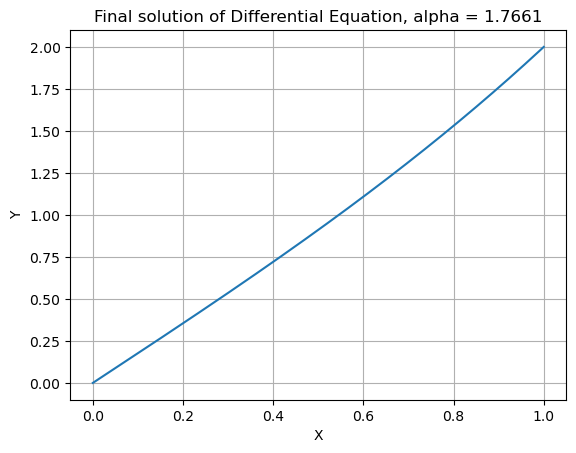

In [11]:
h = 4e-5
x_arr = np.arange(0.0, 1.0, h)
y0 = 0
y1 = 2
alpha = 0
h_alpha = 1e-2
eps = 1e-7

y_new, alpha = shootingMethod(x_arr, y0, y1, calculateY, alpha, h_alpha, eps, h)

plt.grid()
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(x_arr, y_new, label="Solution")
plt.title(f"Final solution of Differential Equation, alpha = {alpha:.4f}")
plt.show()

## Метод квазилинеаризации

In [12]:
def y(y_arr, x, h):
    idx = int(x / h)
    return y_arr[idx]

def FillMatrices(x_arr, y_arr, y0, y1, A, f, N, h):
    for k in range(1, N):
        xk = x_arr[k]
        yk = y(y_arr, xk, h)
        h2 = h**2

        A[k][k - 1] = 1.0 / h2

        A[k][k] = -2.0 / h2 - xk / 2.0 / np.sqrt(yk)

        A[k][k + 1] = 1.0 / h2 

        f[k] = xk / 2.0 * np.sqrt(yk)

    A[0][0] = 1.0    
    A[N][N] = 1.0

    f[0] = y0
    f[N] = y1
    return A, f

In [13]:
def linearMethod(x_arr, y_arr, y0, y1, A, f, N, h, eps):
    A, f = FillMatrices(x_arr, y_arr, y0, y1, A, f, N, h)
    new = np.linalg.solve(A, f)

    iteration = 1
    while np.max(np.abs(y_arr - new)) > eps:
        label = f"iteration = {iteration}"
        y_arr = new
        A, f = FillMatrices(x_arr, y_arr, y0, y1, A, f, N, h)
        new = np.linalg.solve(A, f)
        iteration += 1

    return x_arr, y_arr, iteration

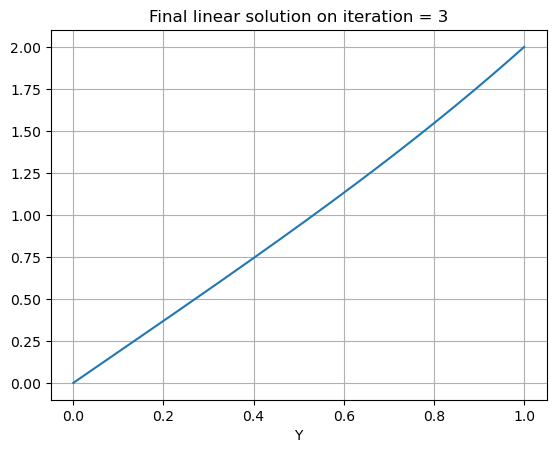

In [14]:
y0 = 0
y1 = 2
eps = 1e-7
h = 1e-4
x_arr = np.arange(0.0, 1.0, h)
N = x_arr.size
y_arr = np.full(N + 1, 1.0)
A = np.zeros((N + 1, N + 1))
f = np.zeros(N + 1)

x_arr, y_arr, iteration = linearMethod(x_arr, y_arr, y0, y1, A, f, N, h, eps)
plt.plot(x_arr, y_arr[:-1])
plt.title(f"Final linear solution on iteration = {iteration}")
plt.grid()
plt.xlabel("X")
plt.xlabel("Y")
plt.show()